# Broken stick - triangle problem
#### by Andrew Rothman

This is a classic toy problem in probability theory, stated as follows: <br>
* You have a stick of arbitrary length. You break the stick in two random places along it's length, generating three pieces. What is the probability you can form a triangle from the resulting three pieces?

In [26]:
######################
## import libraries ##
######################
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 

### Analytic Solution:

([<matplotlib.lines.Line2D at 0x211cfa47240>],
 (0, 2),
 Text(1.5,1.3,'unit length 1'),
 Text(1.1,0.75,'a'),
 Text(1.4,0.75,'b'),
 Text(1.8,0.75,'1-a-b'),
 (0.95, 2.05, 0.0, 2.0))

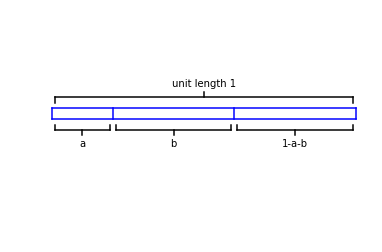

In [27]:
plt.plot([1,2], [1,1], color='blue'), plt.plot([1,2], [1.1,1.1], color='blue'), plt.plot([1,1], [1,1.1], color='blue'), plt.plot([2,2], [1,1.1], color='blue'), plt.plot([1.2,1.2], [1,1.1], color='blue'), plt.plot([1.6,1.6], [1,1.1], color='blue'), plt.ylim([0,2]), plt.plot([1.01,1.01], [1.15,1.2], color='black'), plt.plot([1.99,1.99], [1.15,1.2], color='black'), plt.plot([1.01,1.99], [1.2,1.2], color='black'), plt.plot([1.5,1.5], [1.2,1.25], color='black'), plt.text(1.5, 1.3, 'unit length 1', fontsize=10, horizontalalignment='center'), plt.plot([1.01,1.01], [0.95,0.9], color='black'), plt.plot([1.19,1.19], [0.95,0.9], color='black'), plt.plot([1.01,1.19], [0.9,0.9], color='black'), plt.plot([1.1,1.1], [0.9,0.85], color='black'), plt.text(1.1, 0.75, 'a', fontsize=10, horizontalalignment='center'), plt.plot([1.21,1.21], [0.95,0.9], color='black'), plt.plot([1.59,1.59], [0.95,0.9], color='black'), plt.plot([1.21,1.59], [0.9,0.9], color='black'), plt.plot([1.4,1.4], [0.9,0.85], color='black'), plt.text(1.4, 0.75, 'b', fontsize=10, horizontalalignment='center'), plt.plot([1.61,1.61], [0.95,0.9], color='black'), plt.plot([1.99,1.99], [0.95,0.9], color='black'), plt.plot([1.61,1.99], [0.9,0.9], color='black'), plt.plot([1.8,1.8], [0.9,0.85], color='black'), plt.text(1.8, 0.75, '1-a-b', fontsize=10, horizontalalignment='center'), plt.axis('off')

Let us assume the stick is of unit length "1". Breaking the stick in two random places along it's length results in 3 pieces of length:
$$
\begin{align}
a \\
b \\
1-a-b \\
\end{align}
$$

#### General Boundary Conditions:
The boundary conditions for the three pieces are:
$$
\begin{align}
0<a<1 \\
0<b<1 \\
0<1-a-b<1 \\
\end{align}
$$

#### Boundary Conditions for pieces to form a triangle:
In order for the three pieces to form a triangle, each side must be strictly less than the sum of the two remaining sides. We can therefore specify the boundary conditions for forming a triangle:
$$
\begin{align}
a<b+(1-a-b) \\
a<1-a \\
a<0.5 \\
\\
b<a+(1-a-b) \\
b<1-b \\
b<0.5 \\
\\
(1-a-b)<a+b \\
1<2a+2b \\
b<-a+0.5 \\
\end{align}
$$

Let's plot the probability space as a function of "a" and "b", and the probability space for which the three sides form a triangle:

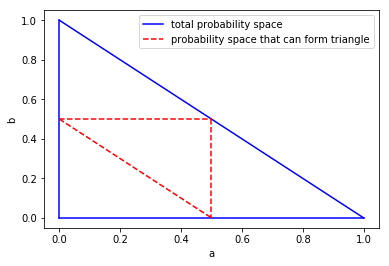

In [28]:
plt.plot([0,1], [1,0], color='blue', label = "total probability space")
plt.plot([0,0], [1,0], color='blue')
plt.plot([0,1], [0,0], color='blue')
plt.plot([0.5,0.5], [0.5,0], color='red', linestyle='dashed', label = "probability space that can form triangle")
plt.plot([0,0.5], [0.5,0.5], color='red', linestyle='dashed')
plt.plot([0,0.5], [0.5,0], color='red', linestyle='dashed')
plt.xlabel('a') 
plt.ylabel('b') 
plt.legend() 

We can see from the plot above that there is a 1/4 probability that the three pieces will form a triangle.

Let us now confirm this through numerical simulation:

### Numerical Simulation:

0.2518

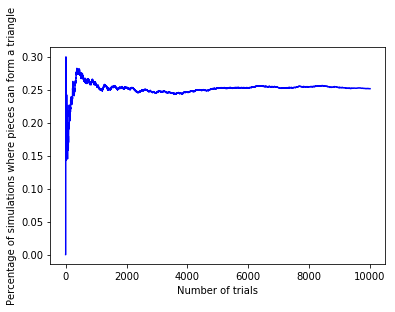

In [29]:
## number of iterations 
iterations = 10000
results = pd.DataFrame()
results['iteration'] = list(range(1,iterations+1))
percentage = iterations*[None]

np.random.seed(10815657)
count = 0
for i in range(0, iterations):
    random_draws = np.random.uniform(low=0, high=1, size=2)
    a = min(random_draws)
    b = abs(random_draws[0] - random_draws[1])
    if((a<0.5) and (b<0.5) and (0.5 < a+b)):
        count=count+1
    percentage[i] = count / (i+1)

results['percentage'] = percentage

plt.plot(results['iteration'], results['percentage'], color='blue')
plt.xlabel('Number of trials') 
plt.ylabel('Percentage of simulations where pieces can form a triangle') 

percentage[iterations-1]